## 1.Bootstraping:


    a) Write a function from scratch that performs sampling with replacement and creates 1000 bootstrap
       samples from the full breast cancer dataset.
    b) Calculate the mean count of OOB samples from all bootstraps.
    c) Speed up your compute time by calling bootstrap function in parallel (multi-threaded)

In [3]:
import pandas as pd
data_trial = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
data_trial.columns=['ID', 'Type_of_Cancer', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30']


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
data_trial.head(5)

,ID,Type_of_Cancer,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# So I will first take out the first two columns since the first one is ID, and the second one is my Y predictor.
main_data = data_trial.drop(['ID', 'Type_of_Cancer'], axis=1)
main_data.head(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [8]:
# Looking for the n number.
main_data.shape

(569, 30)

In [153]:
# In here, I created all boot samples, as well as calculated the mean for each boot sample.
OOB_means = []
all_boot_samples = []
for _ in range(1000):
    boot_sample = main_data.sample(n=569, replace=True)
    all_boot_samples.append(boot_sample)
    combine = main_data.merge(boot_sample.drop_duplicates(), on=['v1','v2', 'v3','v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26','v27', 'v28', 'v29', 'v30'], how='left', indicator=True)
    only_in_main = combine['_merge']=='left_only'
    OOB_Final = main_data[only_in_main]
    OOB_means.append(OOB_Final.mean())

In [157]:
# Making sure it creates the boot sample correctly. This is just only 1, out of the 1000
print(all_boot_samples[0].shape) # each bootsample, needs to have 569 observations and 30 columns, with replacement (so they can be duplicated, etc)
print(len(all_boot_samples)) # perfect, this is exacty what I was looking for 


(569, 30)
1000


In [158]:
# simulated mean of means
OOB_final_mean = np.mean(OOB_means)
OOB_final_mean

61.81320765732076

### c) Multi-threading

In [217]:
import logging
import threading
import time

In [218]:
boot_sample_total=[]
def creating_boot_sample (name):
    logging.info("Thread " + str(name) + ": Running 100 instances of sample job.")
    for i in range (100):
        boot_sample = main_data.sample(n=569, replace=True)
        boot_sample_total.append(boot_sample)
    logging.info("Thread " + str(name) + ": Finished 100 instances of sample job.")

In [219]:
threads = 10
format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")

#start N threads
for i in range (0,threads):
    t = threading.Thread(target=creating_boot_sample, args=(i,))
    t.start()
    #x.join()

logging.info("Threads running.")

12:38:33: Thread 0: Running 100 instances of sample job.
12:38:33: Thread 1: Running 100 instances of sample job.
12:38:33: Thread 2: Running 100 instances of sample job.
12:38:33: Thread 3: Running 100 instances of sample job.
12:38:33: Thread 4: Running 100 instances of sample job.
12:38:33: Thread 5: Running 100 instances of sample job.
12:38:33: Thread 6: Running 100 instances of sample job.
12:38:33: Thread 7: Running 100 instances of sample job.
12:38:33: Thread 8: Running 100 instances of sample job.
12:38:33: Thread 9: Running 100 instances of sample job.
12:38:33: Threads running.
12:38:34: Thread 1: Finished 100 instances of sample job.
12:38:34: Thread 0: Finished 100 instances of sample job.
12:38:34: Thread 3: Finished 100 instances of sample job.
12:38:34: Thread 4: Finished 100 instances of sample job.
12:38:34: Thread 2: Finished 100 instances of sample job.
12:38:34: Thread 6: Finished 100 instances of sample job.
12:38:34: Thread 5: Finished 100 instances of sample jo

In [221]:
for value in boot_sample_total:
    print(value)

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
544  13.870  20.70   89.77   584.8  0.09578  0.10180  0.03688  0.02369  0.1620  0.06688  0.2720  1.0470  2.076   23.12  0.006298  0.021720  0.026150  0.009061  0.01490  0.003599  15.050  24.75   99.17   688.6  0.1264  0.2037  0.13770  0.06845  0.2249  0.08492
339  23.510  24.27  155.10  1747.0  0.10690  0.12830  0.23080  0.14100  0.1797  0.05506  1.0090  0.9245  6.462  164.10  0.006292  0.019710  0.035820  0.013010  0.01479  0.003118  30.670  30.73  202.40  2906.0  0.1515  0.2678  0.48190  0.20890  0.2593  0.07738
71    8.888  14.64   58.79   244.0  0.09783  0.15310  0.08606  0.02872  0.1902  0.08980  0.5262  0.8522  3.168   25.44  0.017210  0.093680  0.056710  0.017660  0.02541  0.021930   9.733  15.67   62.56   284.4  0.1207  0.

        v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
217  10.20  17.48   65.05   321.2  0.08054  0.05907  0.057740  0.01071  0.1964  0.06315  0.3567  1.9220  2.747  22.790  0.004680  0.031200  0.057740  0.010710  0.02560  0.004613  11.48  24.47   75.40   403.7  0.09527  0.13970  0.19250  0.03571  0.2868  0.07809
241  12.42  15.04   78.61   476.5  0.07926  0.03393  0.010530  0.01108  0.1546  0.05754  0.1153  0.6745  0.757   9.006  0.003265  0.004930  0.006493  0.003762  0.01720  0.001360  13.20  20.37   83.85   543.4  0.10370  0.07776  0.06243  0.04052  0.2901  0.06783
523  13.71  18.68   88.73   571.0  0.09916  0.10700  0.053850  0.03783  0.1714  0.06843  0.3191  1.2490  2.284  26.450  0.006739  0.022510  0.020860  0.013520  0.01870  0.003747  15.11  25.63   99.43   701.9  0.14250 

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
334  12.300  19.02   77.88   464.4  0.08313  0.04202  0.007756  0.008535  0.1539  0.05945  0.1840  1.5320  1.199  13.24  0.007881  0.008432  0.007004  0.006522  0.01939  0.002222  13.35  28.46   84.53   544.3  0.1222  0.09052  0.03619  0.03983  0.2554  0.07207
288  11.260  19.96   73.72   394.1  0.08020  0.11810  0.092740  0.055880  0.2595  0.06233  0.4866  1.9050  2.877  34.68  0.015740  0.082620  0.080990  0.034870  0.03418  0.006517  11.86  22.33   78.27   437.6  0.1028  0.18430  0.15460  0.09314  0.2955  0.07009
185  10.080  15.11   63.76   317.5  0.09267  0.04695  0.001597  0.002404  0.1703  0.06048  0.4245  1.2680  2.680  26.43  0.014390  0.012000  0.001597  0.002404  0.02538  0.003470  11.87  21.18   75.39   437.0  0.1521 

        v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13      v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
24   16.65  21.38  110.00  904.6  0.11210  0.14570  0.152500  0.091700  0.1995  0.06330  0.8068  0.9017  5.455  102.600  0.006048  0.018820  0.02741  0.011300  0.01468  0.002801  26.46  31.56  177.00  2215.0  0.18050  0.35780  0.46950  0.20950  0.3613  0.09564
420  11.57  19.04   74.20  409.7  0.08546  0.07722  0.054850  0.014280  0.2031  0.06267  0.2864  1.4400  2.206   20.300  0.007278  0.020470  0.04447  0.008799  0.01868  0.003339  13.07  26.98   86.43   520.5  0.12490  0.19370  0.25600  0.06664  0.3035  0.08284
304  11.46  18.16   73.59  403.1  0.08853  0.07694  0.033440  0.015020  0.1411  0.06243  0.3278  1.0590  2.475   22.930  0.006652  0.026520  0.02221  0.007807  0.01894  0.003411  12.68  21.61   82.69   489.8  0.11440 

         v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
65   14.780  23.94   97.40  668.3  0.11720  0.14790  0.12670  0.090290  0.1953  0.06654  0.3577  1.2810  2.450  35.24  0.006703  0.02310  0.02315  0.011840  0.01900  0.003224  17.31  33.39  114.60   925.1  0.1648  0.3416  0.3024  0.16140  0.3321  0.08911
26   14.580  21.53   97.41  644.8  0.10540  0.18680  0.14250  0.087830  0.2252  0.06924  0.2545  0.9832  2.110  21.05  0.004452  0.03055  0.02681  0.013520  0.01454  0.003711  17.62  33.21  122.40   896.9  0.1525  0.6643  0.5539  0.27010  0.4264  0.12750
264  17.190  22.07  111.60  928.3  0.09726  0.08995  0.09061  0.065270  0.1867  0.05580  0.4203  0.7383  2.819  45.42  0.004493  0.01206  0.02048  0.009875  0.01144  0.001575  21.58  29.33  140.50  1436.0  0.1558  0.2567  0.3889  0.198

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
396  13.510  18.89   88.10   558.1  0.10590  0.11470  0.08580  0.053810  0.1806  0.06079  0.2136  1.3320  1.513  19.290  0.005442  0.01957  0.03304  0.013670  0.01315  0.002464  14.800  27.20   97.33   675.2  0.1428  0.25700  0.34380  0.14530  0.2666  0.07686
553   9.333  21.94   59.01   264.0  0.09240  0.05605  0.03996  0.012820  0.1692  0.06576  0.3013  1.8790  2.121  17.860  0.010940  0.01834  0.03996  0.012820  0.03759  0.004623   9.845  25.05   62.86   295.8  0.1103  0.08298  0.07993  0.02564  0.2435  0.07393
344  11.710  15.45   75.03   420.3  0.11500  0.07281  0.04006  0.032500  0.2009  0.06506  0.3446  0.7395  2.355  24.530  0.009536  0.01097  0.01651  0.011210  0.01953  0.003100  13.060  18.16   84.16   516.4  0.1460  0.1

         v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
354  11.140  14.07   71.24  384.6  0.07274  0.06064  0.04505  0.014710  0.1690  0.06083  0.4222  0.8092  3.330  28.84  0.005541  0.033870  0.045050  0.014710  0.03102  0.004831  12.12  15.82   79.62   453.5  0.08864  0.12560  0.12010  0.03922  0.2576  0.07018
446  17.750  28.03  117.30  981.6  0.09997  0.13140  0.16980  0.082930  0.1713  0.05916  0.3897  1.0770  2.873  43.95  0.004714  0.020150  0.036970  0.011100  0.01237  0.002556  21.53  38.54  145.40  1437.0  0.14010  0.37620  0.63990  0.19700  0.2972  0.09075
223  15.750  20.25  102.60  761.3  0.10250  0.12040  0.11470  0.064620  0.1935  0.06303  0.3473  0.9209  2.244  32.19  0.004766  0.023740  0.023840  0.008637  0.01772  0.003131  19.56  30.29  125.90  1088.0  0.15520  0.4

         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
63    9.173  13.86   59.20  260.9  0.07721  0.08751  0.05988  0.02180  0.2341  0.06963  0.4098  2.2650  2.608  23.52  0.008738  0.03938  0.04312  0.015600  0.04192  0.005822  10.01  19.23   65.59   310.1  0.09836  0.16780  0.13970  0.05087  0.3282  0.08490
298  14.260  18.17   91.22  633.1  0.06576  0.05220  0.02475  0.01374  0.1635  0.05586  0.2300  0.6690  1.661  20.56  0.003169  0.01377  0.01079  0.005243  0.01103  0.001957  16.22  25.26  105.80   819.7  0.09445  0.21670  0.15650  0.07530  0.2636  0.07676
174  10.660  15.15   67.49  349.6  0.08792  0.04302  0.00000  0.00000  0.1928  0.05975  0.3309  1.9250  2.155  21.98  0.008713  0.01017  0.00000  0.000000  0.03265  0.001002  11.54  19.20   73.20   408.3  0.10760  0.06791  0.0000

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11    v12     v13      v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
104  10.49  19.29   67.41   336.1  0.09989  0.08578  0.02995  0.01201  0.2217  0.06481  0.3550  1.534  2.3020   23.130  0.007595  0.02219  0.02880  0.008614  0.02710  0.003451  11.54  23.31   74.22   402.8  0.12190  0.14860  0.07987  0.03203  0.2826  0.07552
16   14.68  20.13   94.74   684.5  0.09867  0.07200  0.07395  0.05259  0.1586  0.05922  0.4727  1.240  3.1950   45.400  0.005718  0.01162  0.01998  0.011090  0.01410  0.002085  19.07  30.88  123.40  1138.0  0.14640  0.18710  0.29140  0.16090  0.3029  0.08216
7    13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366  0.05985  0.2196  0.07451  0.5835  1.377  3.8560   50.960  0.008805  0.03029  0.02488  0.014480  0.01486  0.005412  17.06  28.14  110.60   897.0  0.16540  0.36820

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26     v27      v28     v29      v30
208  13.11  22.54   87.02   529.4  0.10020  0.14830  0.08705  0.05102  0.1850  0.07310  0.1931  0.9223  1.4910  15.090  0.005251  0.030410  0.02526  0.008304  0.02514  0.004198  14.55  29.16   99.48   639.3  0.1349  0.44020  0.3162  0.11260  0.4128  0.10760
530  11.75  17.56   75.89   422.9  0.10730  0.09713  0.05282  0.04440  0.1598  0.06677  0.4384  1.9070  3.1490  30.660  0.006587  0.018150  0.01737  0.013160  0.01835  0.002318  13.50  27.98   88.52   552.3  0.1349  0.18540  0.1366  0.10100  0.2478  0.07757
69   12.78  16.49   81.37   502.5  0.09831  0.05234  0.03653  0.02864  0.1590  0.05653  0.2368  0.8732  1.4710  18.330  0.007962  0.005612  0.01585  0.008662  0.02254  0.001906  13.46  19.76   85.67   554.9  0.1296  0.07061  0

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
557   9.423  27.88   59.26   271.3  0.08123  0.04971  0.000000  0.000000  0.1742  0.06059  0.5375  2.9270  3.618  29.11  0.011590  0.011240  0.000000  0.000000  0.03004  0.003324  10.49  34.24   66.50   330.6  0.10730  0.07158  0.000000  0.00000  0.2475  0.06969
130  12.190  13.29   79.08   455.8  0.10660  0.09509  0.028550  0.028820  0.1880  0.06471  0.2005  0.8163  1.973  15.24  0.006773  0.024560  0.010180  0.008094  0.02662  0.004143  13.34  17.81   91.38   545.2  0.14270  0.25850  0.099150  0.08187  0.3469  0.09241
545  13.620  23.23   87.19   573.2  0.09246  0.06747  0.029740  0.024430  0.1664  0.05801  0.3460  1.3360  2.066  31.24  0.005868  0.020990  0.020210  0.009064  0.02087  0.002583  15.35  29.09   97.58   729.8  0

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26       v27      v28     v29      v30
349  11.95  14.96   77.23   426.7  0.11580  0.12060  0.011710  0.017870  0.2459  0.06581  0.3610  1.0500  2.455  26.65  0.005800  0.024170  0.007816  0.010520  0.02734  0.003114  12.81  17.72   83.09   496.2  0.1293  0.1885  0.031220  0.04766  0.3124  0.07590
327  12.03  17.93   76.09   446.0  0.07683  0.03892  0.001546  0.005592  0.1382  0.06070  0.2335  0.9097  1.466  16.97  0.004729  0.006887  0.001184  0.003951  0.01466  0.001755  13.07  22.25   82.74   523.4  0.1013  0.0739  0.007732  0.02796  0.2171  0.07037
245  10.48  19.86   66.72   337.7  0.10700  0.05971  0.048310  0.030700  0.1737  0.06440  0.3719  2.6120  2.517  23.22  0.016040  0.013860  0.018650  0.011330  0.03476  0.003560  11.48  29.46   73.68   402.8  0.1515  0.1

         v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
451  19.590  25.00  127.70  1191.0  0.10320  0.09871  0.165500  0.09063  0.1663  0.05391  0.4674  1.3750  2.916   56.18  0.011900  0.019290  0.049070  0.014990  0.01641  0.001807  21.440  30.96  139.80  1421.0  0.1528  0.18450  0.39770  0.14660  0.2293  0.06091
426  10.480  14.98   67.49   333.6  0.09816  0.10130  0.063350  0.02218  0.1925  0.06915  0.3276  1.1270  2.564   20.77  0.007364  0.038670  0.052630  0.012640  0.02161  0.004830  12.130  21.57   81.41   440.4  0.1327  0.29960  0.29390  0.09310  0.3020  0.09646
404  12.340  14.95   78.29   469.1  0.08682  0.04571  0.021090  0.02054  0.1571  0.05708  0.3833  0.9078  2.602   30.15  0.007702  0.008491  0.013070  0.010300  0.02970  0.001432  13.180  16.85   84.11   533.1  0.1

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12     v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
299  10.51  23.09   66.85   334.2  0.10150  0.06797  0.02495  0.018750  0.1695  0.06556  0.2868  1.1430   2.289   20.56  0.010170  0.014430  0.01861  0.012500  0.03464  0.001971  10.93  24.22   70.10   362.7  0.1143  0.08614  0.04158  0.03125  0.2227  0.06777
381  11.04  14.93   70.67   372.7  0.07987  0.07079  0.03546  0.020740  0.2003  0.06246  0.1642  1.0310   1.281   11.68  0.005296  0.019030  0.01723  0.006960  0.01880  0.001941  12.09  20.83   79.73   447.1  0.1095  0.19820  0.15530  0.06754  0.3202  0.07287
316  12.18  14.08   77.25   461.4  0.07734  0.03212  0.01123  0.005051  0.1673  0.05649  0.2113  0.5996   1.438   15.82  0.005343  0.005767  0.01123  0.005051  0.01977  0.000950  12.85  16.47   81.60   513.1  0.1001  0.0

         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
552  12.770  29.43   81.35  507.9  0.08276  0.04234  0.01997  0.01499  0.1539  0.05637  0.2409  1.3670  1.477  18.760  0.008835  0.012330  0.01328  0.009305  0.01897  0.001726  13.870  36.00   88.10   594.7  0.1234  0.10640  0.08653  0.06498  0.2407  0.06484
275  11.890  17.36   76.20  435.6  0.12250  0.07210  0.05929  0.07404  0.2015  0.05875  0.6412  2.2930  4.021  48.840  0.014180  0.014890  0.01267  0.019100  0.02678  0.003002  12.400  18.99   79.46   472.4  0.1359  0.08368  0.07153  0.08946  0.2220  0.06033
8    13.000  21.82   87.50  519.8  0.12730  0.19320  0.18590  0.09353  0.2350  0.07389  0.3063  1.0020  2.406  24.320  0.005731  0.035020  0.03553  0.012260  0.02143  0.003749  15.490  30.73  106.20   739.3  0.1703  0.54010

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
242  11.30  18.19   73.93   389.4  0.09592  0.13250  0.15480  0.02854  0.2054  0.07669  0.2428  1.6420  2.369  16.39  0.006663  0.059140  0.08880  0.013140  0.01995  0.008675  12.58  27.96   87.16   472.9  0.13470  0.48480  0.74360  0.12180  0.3308  0.12970
37   13.03  18.42   82.61   523.8  0.08983  0.03766  0.02562  0.02923  0.1467  0.05863  0.1839  2.3420  1.170  14.16  0.004352  0.004899  0.01343  0.011640  0.02671  0.001777  13.30  22.81   84.46   545.9  0.09701  0.04619  0.04833  0.05013  0.1987  0.06169
475  12.83  15.73   82.89   506.9  0.09040  0.08269  0.05835  0.03078  0.1705  0.05913  0.1499  0.4875  1.195  11.64  0.004873  0.017960  0.03318  0.008360  0.01601  0.002289  14.09  19.35   93.22   605.8  0.13260  0.26100  0.

        v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
179  12.81  13.06   81.29   508.8  0.08739  0.03774  0.009193  0.01330  0.1466  0.06133  0.2889  0.9899  1.778   21.79  0.008534  0.006364  0.00618  0.007408  0.01065  0.003351  13.63  16.15   86.70   570.7  0.11620  0.05445  0.02758  0.03990  0.1783  0.07319
275  11.89  17.36   76.20   435.6  0.12250  0.07210  0.059290  0.07404  0.2015  0.05875  0.6412  2.2930  4.021   48.84  0.014180  0.014890  0.01267  0.019100  0.02678  0.003002  12.40  18.99   79.46   472.4  0.13590  0.08368  0.07153  0.08946  0.2220  0.06033
476  14.20  20.53   92.41   618.4  0.08931  0.11080  0.050630  0.03058  0.1506  0.06009  0.3478  1.0180  2.749   31.01  0.004107  0.032880  0.02821  0.013500  0.01610  0.002744  16.45  27.26  112.10   828.5  0.11530  0.3

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
407  12.850  21.37   82.63   514.5  0.07551  0.08316  0.06126  0.01867  0.1580  0.06114  0.4993  1.7980  2.552   41.24  0.006011  0.04480  0.051750  0.013410  0.02669  0.007731  14.40  27.01   91.63   645.8  0.09402  0.1936  0.18380  0.05601  0.2488  0.08151
169  14.970  16.95   96.22   685.9  0.09855  0.07885  0.02602  0.03781  0.1780  0.05650  0.2713  1.2170  1.893   24.28  0.005080  0.01370  0.007276  0.009073  0.01350  0.001706  16.11  23.00  104.60   793.7  0.12160  0.1637  0.06648  0.08485  0.2404  0.06428
225  14.340  13.47   92.51   641.2  0.09906  0.07624  0.05724  0.04603  0.2075  0.05448  0.5220  0.8121  3.763   48.29  0.007089  0.01428  0.023600  0.012860  0.02266  0.001463  16.77  16.90  110.40   873.2  0.12970  0.1525

         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
382  12.050  22.72   78.75  447.8  0.06935  0.10730  0.07943  0.02978  0.1203  0.06659  0.1194  1.4340  1.778    9.549  0.005042  0.045600  0.043050  0.016670  0.02470  0.007358  12.57  28.71   87.36   488.4  0.08799  0.3214  0.29120  0.10920  0.2191  0.09349
206   9.876  17.27   62.92  295.4  0.10890  0.07232  0.01756  0.01952  0.1934  0.06285  0.2137  1.3420  1.517   12.330  0.009719  0.012490  0.007975  0.007527  0.02210  0.002472  10.42  23.22   67.08   331.6  0.14150  0.1247  0.06213  0.05588  0.2989  0.07380
283  16.240  18.77  108.80  805.1  0.10660  0.18020  0.19480  0.09052  0.1876  0.06684  0.2873  0.9173  2.464   28.090  0.004563  0.034810  0.038720  0.012090  0.01388  0.004081  18.55  25.09  126.90  1031.0  0.13650  0.

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
2    19.690  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069  0.05999  0.7456  0.7869  4.585   94.03  0.006150  0.04006  0.038320  0.020580  0.02250  0.004571  23.57  25.53  152.50  1709.0  0.1444  0.42450  0.45040  0.24300  0.3613  0.08758
431  12.400  17.68   81.47   467.8  0.10540  0.13160  0.07741  0.02799  0.1811  0.07102  0.1767  1.4600  2.204   15.43  0.010000  0.03295  0.048610  0.011670  0.02187  0.006005  12.88  22.91   89.61   515.8  0.1450  0.26290  0.24030  0.07370  0.2556  0.09359
557   9.423  27.88   59.26   271.3  0.08123  0.04971  0.00000  0.00000  0.1742  0.06059  0.5375  2.9270  3.618   29.11  0.011590  0.01124  0.000000  0.000000  0.03004  0.003324  10.49  34.24   66.50   330.6  0.1073  0.07158

         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
371  15.190  13.21   97.65  711.8  0.07963  0.06934  0.03393  0.02657  0.1721  0.05544  0.1783  0.4125  1.338  17.72  0.005012  0.014850  0.01551  0.009155  0.01647  0.001767  16.20  15.73  104.50   819.1  0.11260  0.17370  0.13620  0.08178  0.2487  0.06766
416   9.405  21.70   59.60  271.2  0.10440  0.06159  0.02047  0.01257  0.2025  0.06601  0.4302  2.8780  2.759  25.17  0.014740  0.016740  0.01367  0.008674  0.03044  0.004590  10.85  31.24   68.73   359.4  0.15260  0.11930  0.06141  0.03770  0.2872  0.08304
156  17.680  20.74  117.40  963.7  0.11150  0.16650  0.18550  0.10540  0.1971  0.06166  0.8113  1.4000  5.540  93.91  0.009037  0.049540  0.05206  0.018410  0.01778  0.004968  20.47  25.11  132.90  1302.0  0.14180  0.34980  0.

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26     v27      v28     v29      v30
363  16.500  18.29  106.60   838.1  0.09686  0.08468  0.05862  0.04835  0.1495  0.05593  0.3389  1.4390  2.344  33.58  0.007257  0.018050  0.01832  0.010330  0.01694  0.002001  18.13  25.45  117.20  1009.0  0.13380  0.16790  0.1663  0.09123  0.2394  0.06469
519  12.750  16.70   82.51   493.8  0.11250  0.11170  0.03880  0.02995  0.2120  0.06623  0.3834  1.0030  2.495  28.62  0.007509  0.015610  0.01977  0.009199  0.01805  0.003629  14.45  21.74   93.63   624.1  0.14750  0.19790  0.1423  0.08045  0.3071  0.08557
249  11.520  14.93   73.87   406.3  0.10130  0.07808  0.04328  0.02929  0.1883  0.06168  0.2562  1.0380  1.686  18.62  0.006662  0.012280  0.02105  0.010060  0.01677  0.002784  12.65  21.19   80.88   491.8  0.13890  0.15820  0

[569 rows x 30 columns]
         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
508  16.300  15.70  104.70  819.8  0.09427  0.06712  0.05526  0.04563  0.1711  0.05657  0.2067  0.4706  1.146  20.67  0.007394  0.01203  0.024700  0.014310  0.01344  0.002569  17.32  17.76  109.80   928.2  0.1354  0.1361  0.19470  0.13570  0.2300  0.07230
326  14.110  12.88   90.03  616.5  0.09309  0.05306  0.01765  0.02733  0.1373  0.05700  0.2571  1.0810  1.558  23.92  0.006692  0.01132  0.005717  0.006627  0.01416  0.002476  15.53  18.00   98.40   749.9  0.1281  0.1109  0.05307  0.05890  0.2100  0.07083
370  16.350  23.29  109.00  840.4  0.09742  0.14970  0.18110  0.08773  0.2175  0.06218  0.4312  1.0220  2.972  45.50  0.005635  0.03917  0.060720  0.016560  0.03197  0.004085  19.38  31.03  129.30  1165.0  0.

         v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12     v13      v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
560  14.050  27.15   91.38   600.4  0.09929  0.11260  0.044620  0.04304  0.1537  0.06171  0.3645  1.4920  2.8880   29.840  0.007256  0.026780  0.02071  0.016260  0.02080  0.005304  15.30  33.17  100.20   706.7  0.1241  0.22640  0.13260  0.10480  0.2250  0.08321
547  10.260  16.58   65.85   320.8  0.08877  0.08066  0.043580  0.02438  0.1669  0.06714  0.1144  1.0230  0.9887    7.326  0.010270  0.030840  0.02613  0.010970  0.02277  0.005890  10.83  22.04   71.08   357.4  0.1461  0.22460  0.17830  0.08333  0.2691  0.09479
179  12.810  13.06   81.29   508.8  0.08739  0.03774  0.009193  0.01330  0.1466  0.06133  0.2889  0.9899  1.7780   21.790  0.008534  0.006364  0.00618  0.007408  0.01065  0.003351  13.63  16.15   86.70   570.7  0.1

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11    v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
276  11.33  14.16   71.79   396.6  0.09379  0.03872  0.001487  0.003333  0.1954  0.05821  0.2375  1.280  1.565  17.09  0.008426  0.008998  0.001487  0.003333  0.02358  0.001627  12.20  18.99   77.37   458.0  0.12590  0.07348  0.004955  0.01111  0.2758  0.06386
232  11.22  33.81   70.79   386.8  0.07780  0.03574  0.004967  0.006434  0.1845  0.05828  0.2239  1.647  1.489  15.46  0.004359  0.006813  0.003223  0.003419  0.01916  0.002534  12.36  41.78   78.44   470.9  0.09994  0.06885  0.023180  0.03002  0.2911  0.07307
129  19.79  25.12  130.40  1192.0  0.10150  0.15890  0.254500  0.114900  0.2202  0.06113  0.4953  1.199  2.765  63.33  0.005033  0.031790  0.047550  0.010430  0.01578  0.003224  22.63  33.58  148.70  1589.0  0.12750  

         v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23    v24     v25     v26       v27      v28     v29      v30
325  12.670  17.30   81.25  489.9  0.10280  0.07664  0.031930  0.021070  0.1707  0.05984  0.2100  0.9505  1.566  17.610  0.006809  0.009514  0.013290  0.006474  0.02057  0.001784  13.710  21.10   88.70  574.4  0.1384  0.1212  0.102000  0.05602  0.2688  0.06888
114   8.726  15.83   55.84  230.9  0.11500  0.08201  0.041320  0.019240  0.1649  0.07633  0.1665  0.5864  1.354   8.966  0.008261  0.022130  0.032590  0.010400  0.01708  0.003806   9.628  19.62   64.48  284.4  0.1724  0.2364  0.245600  0.10500  0.2926  0.10170
251  11.500  18.45   73.28  407.4  0.09345  0.05991  0.026380  0.020690  0.1834  0.05934  0.3927  0.8429  2.684  26.990  0.006380  0.010650  0.012450  0.009175  0.02292  0.001461  12.970  22.46   83.12  508.9  0.1183 

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
503  23.09  19.83  152.10  1682.0  0.09342  0.12750  0.16760  0.10030  0.1505  0.05484  1.2910  0.7452  9.6350  180.200  0.005753  0.033560  0.039760  0.021560  0.02201  0.002897  30.79  23.87  211.50  2782.0  0.11990  0.36250  0.37940  0.22640  0.2908  0.07277
558  14.59  22.68   96.39   657.1  0.08473  0.13300  0.10290  0.03736  0.1454  0.06147  0.2254  1.1080  2.2240   19.540  0.004242  0.046390  0.065780  0.016060  0.01638  0.004406  15.48  27.27  105.90   733.5  0.10260  0.31710  0.36620  0.11050  0.2258  0.08004
527  12.34  12.27   78.94   468.5  0.09003  0.06307  0.02958  0.02647  0.1689  0.05808  0.1166  0.4957  0.7714    8.955  0.003681  0.009169  0.008732  0.005740  0.01129  0.001366  13.61  19.27   87.22   564.9  0.12

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
239  17.46  39.28  113.40   920.6  0.09812  0.12980  0.14170  0.088110  0.1809  0.05966  0.5366  0.8561  3.002  49.00  0.004860  0.027850  0.02602  0.013740  0.01226  0.002759  22.51  44.87  141.20  1408.0  0.1365  0.37350  0.32410  0.20660  0.2853  0.08496
386  12.21  14.09   78.78   462.0  0.08108  0.07823  0.06839  0.025340  0.1646  0.06154  0.2666  0.8309  2.097  19.96  0.004405  0.030260  0.04344  0.010870  0.01921  0.004622  13.13  19.29   87.65   529.9  0.1026  0.24310  0.30760  0.09140  0.2677  0.08824
546  10.32  16.35   65.31   324.9  0.09434  0.04994  0.01012  0.005495  0.1885  0.06201  0.2104  0.9670  1.356  12.97  0.007086  0.007247  0.01012  0.005495  0.01560  0.002606  11.25  21.77   71.12   384.9  0.1285  0.08842  0.

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
318   9.042  18.90   60.07   244.5  0.09968  0.19720  0.19750  0.049080  0.2330  0.08743  0.4653  1.9110  3.769  24.200  0.009845  0.065900  0.102700  0.025270  0.03491  0.007877  10.060  23.40   68.62   297.1  0.1221  0.3748  0.46090  0.11450  0.3135  0.10550
357  13.870  16.21   88.52   593.7  0.08743  0.05492  0.01502  0.020880  0.1424  0.05883  0.2543  1.3630  1.737  20.740  0.005638  0.007939  0.005254  0.006042  0.01544  0.002087  15.110  25.58   96.74   694.4  0.1153  0.1008  0.05285  0.05556  0.2362  0.07113
416   9.405  21.70   59.60   271.2  0.10440  0.06159  0.02047  0.012570  0.2025  0.06601  0.4302  2.8780  2.759  25.170  0.014740  0.016740  0.013670  0.008674  0.03044  0.004590  10.850  31.24   68.73   359.4  0.1526

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13      v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
542  14.74  25.42   94.70   668.6  0.08275  0.07214  0.04105  0.030270  0.1840  0.05680  0.3031  1.3850  2.177   27.410  0.004775  0.01172  0.019470  0.012690  0.01870  0.002626  16.51  32.29  107.40   826.4  0.1060  0.1376  0.16110  0.10950  0.2722  0.06956
377  13.46  28.21   85.89   562.1  0.07517  0.04726  0.01271  0.011170  0.1421  0.05763  0.1689  1.1500  1.400   14.910  0.004942  0.01203  0.007508  0.005179  0.01442  0.001684  14.69  35.63   97.11   680.6  0.1108  0.1457  0.07934  0.05781  0.2694  0.07061
29   17.57  15.05  115.00   955.1  0.09847  0.11570  0.09875  0.079530  0.1739  0.06149  0.6003  0.8225  4.655   61.100  0.005627  0.03033  0.034070  0.013540  0.01925  0.003742  20.01  19.52  134.90  1227.0  0.1255  0.2812

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
54   15.100  22.02   97.26   712.8  0.09056  0.07081  0.05253  0.033340  0.1616  0.05684  0.3105  0.8339  2.097  29.910  0.004675  0.010300  0.01603  0.009222  0.01095  0.001629  18.100  31.69  117.70  1030.0  0.13890  0.20570  0.27120  0.15300  0.2675  0.07873
160  11.750  20.18   76.10   419.8  0.10890  0.11410  0.06843  0.037380  0.1993  0.06453  0.5018  1.6930  3.926  38.340  0.009433  0.024050  0.04167  0.011520  0.03397  0.005061  13.320  26.21   88.91   543.9  0.13580  0.18920  0.19560  0.07909  0.3168  0.07987
296  10.910  12.35   69.14   363.7  0.08518  0.04721  0.01236  0.013690  0.1449  0.06031  0.1753  1.0270  1.267  11.090  0.003478  0.012210  0.01072  0.009393  0.02941  0.003428  11.370  14.82   72.42   392.2  0.09

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
319  12.43  17.00   78.60   477.3  0.07557  0.03454  0.01342  0.01699  0.1472  0.05561  0.3778  2.2000  2.487   31.16  0.007357  0.010790  0.009959  0.011200  0.03433  0.002961  12.90  20.21   81.76   515.9  0.08409  0.04712  0.02237  0.02832  0.1901  0.05932
120  11.41  10.82   73.34   403.3  0.09373  0.06685  0.03512  0.02623  0.1667  0.06113  0.1408  0.4607  1.103   10.50  0.006040  0.015290  0.015140  0.006460  0.01344  0.002206  12.82  15.97   83.74   510.5  0.15480  0.23900  0.21020  0.08958  0.3016  0.08523
303  10.49  18.61   66.86   334.3  0.10680  0.06678  0.02297  0.01780  0.1482  0.06600  0.1485  1.5630  1.035   10.08  0.008875  0.009362  0.018080  0.009199  0.01791  0.003317  11.06  24.54   70.76   375.4  0.14130  0.1

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
122  24.25  20.20  166.20  1761.0  0.14470  0.28670  0.42680  0.20120  0.2655  0.06877  1.5090  3.1200  9.807  233.00  0.023330  0.09806  0.127800  0.018220  0.04547  0.009875  26.02  23.99  180.90  2073.0  0.1696  0.4244  0.58030  0.22480  0.3222  0.08009
320  10.25  16.18   66.52   324.2  0.10610  0.11110  0.06726  0.03965  0.1743  0.07279  0.3677  1.4710  1.597   22.68  0.010490  0.04265  0.040040  0.015440  0.02719  0.007596  11.28  20.61   71.53   390.4  0.1402  0.2360  0.18980  0.09744  0.2608  0.09702
49   13.49  22.30   86.91   561.0  0.08752  0.07698  0.04751  0.03384  0.1809  0.05718  0.2338  1.3530  1.735   20.20  0.004455  0.01382  0.020950  0.011840  0.01641  0.001956  15.15  31.82   99.00   698.8  0.1162  0.1711  0.2282

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26       v27       v28     v29      v30
317  18.220  18.87  118.70  1027.0  0.09746  0.11170  0.11300  0.079500  0.1807  0.05664  0.4041  0.5503  2.547  48.900  0.004821  0.016590  0.024080  0.011430  0.01275  0.002451  21.840  25.00  140.90  1485.0  0.14340  0.27630  0.385300  0.177600  0.2812  0.08198
319  12.430  17.00   78.60   477.3  0.07557  0.03454  0.01342  0.016990  0.1472  0.05561  0.3778  2.2000  2.487  31.160  0.007357  0.010790  0.009959  0.011200  0.03433  0.002961  12.900  20.21   81.76   515.9  0.08409  0.04712  0.022370  0.028320  0.1901  0.05932
285  12.580  18.40   79.83   489.0  0.08393  0.04216  0.00186  0.002924  0.1697  0.05855  0.2719  1.3500  1.721  22.450  0.006383  0.008008  0.001860  0.002924  0.02571  0.002015  13.500  23.08   85.56   5

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
193  12.340  26.86   81.15   477.4  0.10340  0.13530  0.10850  0.04562  0.1943  0.06937  0.4053  1.8090  2.642   34.44  0.009098  0.038450  0.03763  0.013210  0.01878  0.005672  15.65  39.34  101.70   768.9  0.1785  0.47060  0.44250  0.14590  0.3215  0.12050
359   9.436  18.32   59.82   278.6  0.10090  0.05956  0.02710  0.01406  0.1506  0.06959  0.5079  1.2470  3.267   30.48  0.006836  0.008982  0.02348  0.006565  0.01942  0.002713  12.02  25.02   75.79   439.6  0.1333  0.10490  0.11440  0.05052  0.2454  0.08136
399  11.800  17.26   75.26   431.9  0.09087  0.06232  0.02853  0.01638  0.1847  0.06019  0.3438  1.1400  2.225   25.06  0.005463  0.019640  0.02079  0.005398  0.01477  0.003071  13.45  24.49   86.00   562.0  0.1244  0.17260

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
435  13.980  19.62   91.12   599.5  0.10600  0.11330  0.11260  0.064630  0.1669  0.06544  0.2208  0.9533  1.602   18.85  0.005314  0.01791  0.02185  0.009567  0.01223  0.002846  17.040  30.80  113.90   869.3  0.16130  0.3568  0.40690  0.18270  0.3179  0.10550
489  16.690  20.20  107.10   857.6  0.07497  0.07112  0.03649  0.023070  0.1846  0.05325  0.2473  0.5679  1.775   22.95  0.002667  0.01446  0.01423  0.005297  0.01961  0.001700  19.180  26.56  127.30  1084.0  0.10090  0.2920  0.24770  0.08737  0.4677  0.07623
496  12.650  18.17   82.69   485.6  0.10760  0.13340  0.08017  0.050740  0.1641  0.06854  0.2324  0.6332  1.696   18.40  0.005704  0.02502  0.02636  0.010320  0.01759  0.003563  14.380  22.15   95.29   633.7  0.15330  0.

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
273   9.742  15.67   61.50   289.9  0.09037  0.04689  0.011030  0.014070  0.2081  0.06312  0.2684  1.4090  1.750   16.39  0.013800  0.010670  0.008347  0.009472  0.01798  0.004261  10.75  20.88   68.09   355.2  0.14670  0.09370  0.040430  0.05159  0.2841  0.08175
530  11.750  17.56   75.89   422.9  0.10730  0.09713  0.052820  0.044400  0.1598  0.06677  0.4384  1.9070  3.149   30.66  0.006587  0.018150  0.017370  0.013160  0.01835  0.002318  13.50  27.98   88.52   552.3  0.13490  0.18540  0.136600  0.10100  0.2478  0.07757
360  12.540  18.07   79.42   491.9  0.07436  0.02650  0.001194  0.005449  0.1528  0.05185  0.3511  0.9527  2.329   28.30  0.005783  0.004693  0.000793  0.003617  0.02043  0.001058  13.72  20.98   86.82   585.

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
45   18.650  17.60  123.70  1076.0  0.10990  0.16860  0.19740  0.100900  0.1907  0.06049  0.6289  0.6633  4.293  71.56  0.006294  0.03994  0.05554  0.016950  0.02428  0.003535  22.820  21.32  150.60  1567.0  0.16790  0.5090  0.73450  0.23780  0.3799  0.09185
358   8.878  15.49   56.74   241.0  0.08293  0.07698  0.04721  0.023810  0.1930  0.06621  0.5381  1.2000  4.277  30.18  0.010930  0.02899  0.03214  0.015060  0.02837  0.004174   9.981  17.70   65.27   302.0  0.10150  0.1248  0.09441  0.04762  0.2434  0.07431
472  14.920  14.93   96.45   686.9  0.08098  0.08549  0.05539  0.032210  0.1687  0.05669  0.2446  0.4334  1.826  23.31  0.003271  0.01770  0.02310  0.008399  0.01148  0.002379  17.180  18.22  112.00   906.6  0.10650  0.2791

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
309  13.050  13.84   82.71   530.6  0.08352  0.03735  0.004559  0.008829  0.1453  0.05518  0.3975  0.8285  2.567   33.01  0.004148  0.004711  0.002831  0.004821  0.01422  0.002273  14.73  17.40   93.96   672.4  0.10160  0.05847  0.01824  0.03532  0.2107  0.06580
176   9.904  18.06   64.60   302.4  0.09699  0.12940  0.130700  0.037160  0.1669  0.08116  0.4311  2.2610  3.132   27.48  0.012860  0.088080  0.119700  0.024600  0.03880  0.017920  11.26  24.39   73.07   390.2  0.13010  0.29500  0.34860  0.09910  0.2614  0.11620
546  10.320  16.35   65.31   324.9  0.09434  0.04994  0.010120  0.005495  0.1885  0.06201  0.2104  0.9670  1.356   12.97  0.007086  0.007247  0.010120  0.005495  0.01560  0.002606  11.25  21.77   71.12   384.9  

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
362  12.76  18.84   81.87   496.6  0.09676  0.07952  0.02688  0.01781  0.1759  0.06183  0.2213  1.2850  1.535   17.26  0.005608  0.01646  0.01529  0.009997  0.01909  0.002133  13.75  25.99   87.82   579.7  0.1298  0.1839  0.1255  0.08312  0.2744  0.07238
541  14.47  24.99   95.81   656.4  0.08837  0.12300  0.10090  0.03890  0.1872  0.06341  0.2542  1.0790  2.615   23.11  0.007138  0.04653  0.03829  0.011620  0.02068  0.006111  16.22  31.73  113.50   808.9  0.1340  0.4202  0.4040  0.12050  0.3187  0.10230
252  19.73  19.82  130.70  1206.0  0.10620  0.18490  0.24170  0.09740  0.1733  0.06697  0.7661  0.7800  4.115   92.81  0.008482  0.05057  0.06800  0.019710  0.01467  0.007259  25.28  25.59  159.80  1933.0  0.1710  0.5955  0.8489  0.250

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18       v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
2    19.690  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069  0.05999  0.7456  0.7869  4.585   94.03  0.006150  0.04006  0.03832  0.020580  0.022500  0.004571  23.570  25.53  152.50  1709.0  0.14440  0.42450  0.45040  0.24300  0.3613  0.08758
284  12.890  15.70   84.08   516.6  0.07818  0.09580  0.11150  0.03390  0.1432  0.05935  0.2913  1.3890  2.347   23.29  0.006418  0.03961  0.07927  0.017740  0.018780  0.003696  13.900  19.69   92.12   595.6  0.09926  0.23170  0.33440  0.10170  0.1999  0.07127
22   15.340  14.26  102.50   704.4  0.10730  0.21350  0.20770  0.09756  0.2521  0.07032  0.4388  0.7096  3.384   44.91  0.006789  0.05328  0.06446  0.022520  0.036720  0.004394  18.070  19.08  125.10   980.9  0.13900 

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
62   14.250  22.15   96.42   645.7  0.10490  0.20080  0.21350  0.08653  0.1949  0.07292  0.7036  1.2680  5.3730   60.78  0.009407  0.070560  0.068990  0.018480  0.01700  0.006113  17.67  29.51  119.10   959.5  0.1640  0.62470  0.69220  0.17850  0.2844  0.11320
54   15.100  22.02   97.26   712.8  0.09056  0.07081  0.05253  0.03334  0.1616  0.05684  0.3105  0.8339  2.0970   29.91  0.004675  0.010300  0.016030  0.009222  0.01095  0.001629  18.10  31.69  117.70  1030.0  0.1389  0.20570  0.27120  0.15300  0.2675  0.07873
50   11.760  21.60   74.72   427.9  0.08637  0.04966  0.01657  0.01115  0.1495  0.05888  0.4062  1.2100  2.6350   28.47  0.005857  0.009758  0.011680  0.007445  0.02406  0.001769  12.98  25.72   82.98   516.5  0.1085 

         v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
534  10.960  17.62   70.79  365.6  0.09687  0.09752  0.05263  0.027880  0.1619  0.06408  0.1507  1.5830  1.165  10.090  0.009501  0.033780  0.04401  0.013460  0.01322  0.003534  11.620  26.51   76.43   407.5  0.14280  0.2510  0.21230  0.09861  0.2289  0.08278
467   9.668  18.10   61.06  286.3  0.08311  0.05428  0.01479  0.005769  0.1680  0.06412  0.3416  1.3120  2.275  20.980  0.010980  0.012570  0.01031  0.003934  0.02693  0.002979  11.150  24.62   71.11   380.2  0.13880  0.1255  0.06409  0.02500  0.3057  0.07875
363  16.500  18.29  106.60  838.1  0.09686  0.08468  0.05862  0.048350  0.1495  0.05593  0.3389  1.4390  2.344  33.580  0.007257  0.018050  0.01832  0.010330  0.01694  0.002001  18.130  25.45  117.20  1009.0  0.13380  0.

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13      v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
85   18.460  18.52  121.10  1075.0  0.09874  0.10530  0.13350  0.087950  0.2132  0.06022  0.6997  1.4750  4.782   80.600  0.006471  0.01649  0.02806  0.014200  0.02370  0.003755  22.930  27.68  152.20  1603.0  0.1398  0.2089  0.3157  0.16420  0.3695  0.08579
535  20.550  20.86  137.80  1308.0  0.10460  0.17390  0.20850  0.132200  0.2127  0.06251  0.6986  0.9901  4.706   87.780  0.004578  0.02616  0.04005  0.014210  0.01948  0.002689  24.300  25.48  160.20  1809.0  0.1268  0.3135  0.4433  0.21480  0.3077  0.07569
312  12.760  13.37   82.29   504.1  0.08794  0.07948  0.04052  0.025480  0.1601  0.06140  0.3265  0.6594  2.346   25.180  0.006494  0.02768  0.03137  0.010690  0.01731  0.004392  14.190  16.40   92.04   618.8  0.1194  0.220

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13      v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
561  11.200  29.37   70.67   386.0  0.07449  0.03558  0.00000  0.00000  0.1060  0.05502  0.3141  3.8960  2.041   22.810  0.007594  0.008878  0.000000  0.000000  0.01989  0.001773  11.920  38.30   75.19   439.6  0.09267  0.05494  0.00000  0.00000  0.1566  0.05905
524   9.847  15.68   63.00   293.2  0.09492  0.08419  0.02330  0.02416  0.1387  0.06891  0.2498  1.2160  1.976   15.240  0.008732  0.020420  0.010620  0.006801  0.01824  0.003494  11.240  22.99   74.32   376.5  0.14190  0.22430  0.08434  0.06528  0.2502  0.09209
567  20.600  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397  0.07016  0.7260  1.5950  5.772   86.220  0.006522  0.061580  0.071170  0.016640  0.02324  0.006185  25.740  39.42  184.60  1821.0  

        v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
126  13.61  24.69   87.76  572.6  0.09258  0.07862  0.05285  0.030850  0.1761  0.06130  0.2310  1.0050  1.752  19.83  0.004088  0.011740  0.017960  0.006880  0.01323  0.001465  16.89  35.64  113.20   848.7  0.14710  0.2884  0.37960  0.13290  0.3470  0.07900
201  17.54  19.32  115.10  951.6  0.08968  0.11980  0.10360  0.074880  0.1506  0.05491  0.3971  0.8282  3.088  40.73  0.006090  0.025690  0.027130  0.013450  0.01594  0.002658  20.42  25.84  139.50  1239.0  0.13810  0.3420  0.35080  0.19390  0.2928  0.07867
204  12.47  18.60   81.09  481.9  0.09965  0.10580  0.08005  0.038210  0.1925  0.06373  0.3961  1.0440  2.497  30.29  0.006953  0.019110  0.027010  0.010370  0.01782  0.003586  14.97  24.64   96.05   677.9  0.14260  0.2378  0.

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
281  11.74  14.02   74.24   427.3  0.07813  0.04340  0.022450  0.027630  0.2101  0.06113  0.5619  1.2680  3.717   37.83  0.008034  0.014420  0.015140  0.018460  0.02921  0.002005  13.31  18.26   84.70   533.7  0.1036  0.08500  0.06735  0.08290  0.3101  0.06688
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.300100  0.147100  0.2419  0.07871  1.0950  0.9053  8.589  153.40  0.006399  0.049040  0.053730  0.015870  0.03003  0.006193  25.38  17.33  184.60  2019.0  0.1622  0.66560  0.71190  0.26540  0.4601  0.11890
309  13.05  13.84   82.71   530.6  0.08352  0.03735  0.004559  0.008829  0.1453  0.05518  0.3975  0.8285  2.567   33.01  0.004148  0.004711  0.002831  0.004821  0.01422  0.002273  14.73  17.40   93.96   672.4  0.1016 

         v1     v2      v3     v4       v5       v6        v7       v8      v9      v10     v11     v12    v13      v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
350  11.660  17.07   73.70  421.0  0.07561  0.03630  0.008306  0.01162  0.1671  0.05731  0.3534  0.6724  2.225   26.030  0.006583  0.006991  0.005949  0.006296  0.02216  0.002668  13.280  19.74   83.61   542.5  0.09958  0.06476  0.03046  0.04262  0.2731  0.06825
67   11.310  19.04   71.80  394.1  0.08139  0.04701  0.037090  0.02230  0.1516  0.05667  0.2727  0.9429  1.831   18.150  0.009282  0.009216  0.020630  0.008965  0.02183  0.002146  12.330  23.84   78.00   466.7  0.12900  0.09148  0.14440  0.06961  0.2400  0.06641
98   11.600  12.84   74.34  412.6  0.08983  0.07525  0.041960  0.03350  0.1620  0.06582  0.2315  0.5391  1.475   15.750  0.006153  0.013300  0.016930  0.006884  0.01651  0.002551  13.060  17.16   82.96   512.5  

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
514  15.05  19.07   97.26   701.9  0.09215  0.08597  0.07486  0.04335  0.1561  0.05915  0.3860  1.1980  2.630   38.49  0.004952  0.016300  0.029670  0.009423  0.01152  0.001718  17.58  28.06  113.80   967.0  0.1246  0.2101  0.28660  0.11200  0.2282  0.06954
563  20.92  25.09  143.00  1347.0  0.10990  0.22360  0.31740  0.14740  0.2149  0.06879  0.9622  1.0260  8.758  118.80  0.006399  0.043100  0.078450  0.026240  0.02057  0.006213  24.29  29.41  179.10  1819.0  0.1407  0.4186  0.65990  0.25420  0.2929  0.09873
331  12.98  19.35   84.52   514.0  0.09579  0.11250  0.07107  0.02950  0.1761  0.06540  0.2684  0.5664  2.465   20.65  0.005727  0.032550  0.043930  0.009811  0.02751  0.004572  14.42  21.95   99.21   6

         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12     v13    v14       v15      v16       v17       v18       v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
356  13.050  18.59   85.09  512.0  0.10820  0.13040  0.09603  0.05603  0.2035  0.06501  0.3106  1.5100  2.5900  21.57  0.007807  0.03932  0.051120  0.018760  0.028600  0.005715  14.19  24.85   94.22   591.2  0.13430  0.26580  0.25730  0.12580  0.3113  0.08317
421  14.690  13.98   98.22  656.1  0.10310  0.18360  0.14500  0.06300  0.2086  0.07406  0.5462  1.5110  4.7950  49.45  0.009976  0.05244  0.052780  0.015800  0.026530  0.005444  16.46  18.34  114.10   809.2  0.13120  0.36350  0.32190  0.11080  0.2827  0.09208
466  13.140  20.74   85.98  536.9  0.08675  0.10890  0.10850  0.03510  0.1562  0.06020  0.3152  0.7884  2.3120  27.40  0.007295  0.03179  0.046150  0.012540  0.015610  0.003230  14.80  25.46  100.90   689.1  0.13510  0.3

        v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
400  17.91  21.02  124.40  994.0  0.12300  0.25760  0.31890  0.11980  0.2113  0.07115  0.4030  0.7747  3.123  41.51  0.007159  0.037180  0.061650  0.010510  0.01591  0.005099  20.80  27.78  149.60  1304.0  0.1873  0.59170  0.90340  0.19640  0.3245  0.11980
355  12.56  19.07   81.92  485.8  0.08760  0.10380  0.10300  0.04391  0.1533  0.06184  0.3602  1.4780  3.212  27.49  0.009853  0.042350  0.062710  0.019660  0.02639  0.004205  13.37  22.43   89.02   547.4  0.1096  0.20020  0.23880  0.09265  0.2121  0.07188
220  13.65  13.16   87.88  568.9  0.09646  0.08711  0.03888  0.02563  0.1360  0.06344  0.2102  0.4336  1.391  17.40  0.004133  0.016950  0.016520  0.006659  0.01371  0.002735  15.34  16.35   99.71   706.2  0.1311  0.24740  0.1759

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
45   18.650  17.60  123.70  1076.0  0.10990  0.16860  0.197400  0.100900  0.1907  0.06049  0.6289  0.6633  4.293   71.56  0.006294  0.03994  0.055540  0.016950  0.02428  0.003535  22.82  21.32  150.60  1567.0  0.1679  0.50900  0.73450  0.23780  0.3799  0.09185
377  13.460  28.21   85.89   562.1  0.07517  0.04726  0.012710  0.011170  0.1421  0.05763  0.1689  1.1500  1.400   14.91  0.004942  0.01203  0.007508  0.005179  0.01442  0.001684  14.69  35.63   97.11   680.6  0.1108  0.14570  0.07934  0.05781  0.2694  0.07061
28   15.300  25.27  102.40   732.4  0.10820  0.16970  0.168300  0.087510  0.1926  0.06540  0.4390  1.0120  3.498   43.50  0.005233  0.03057  0.035760  0.010830  0.01768  0.002967  20.27  36.71  149.30  1269.0  0.1641 

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11    v12    v13     v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
362  12.76  18.84   81.87   496.6  0.09676  0.07952  0.02688  0.01781  0.1759  0.06183  0.2213  1.285  1.535   17.26  0.005608  0.01646  0.015290  0.009997  0.01909  0.002133  13.75  25.99   87.82   579.7  0.12980  0.18390  0.12550  0.08312  0.2744  0.07238
74   12.31  16.52   79.19   470.9  0.09172  0.06829  0.03372  0.02272  0.1720  0.05914  0.2505  1.025  1.740   19.68  0.004854  0.01819  0.018260  0.007965  0.01386  0.002304  14.11  23.21   89.71   611.1  0.11760  0.18430  0.17030  0.08660  0.2618  0.07609
191  12.77  21.41   82.02   507.4  0.08749  0.06601  0.03112  0.02864  0.1694  0.06287  0.7311  1.748  5.118   53.65  0.004571  0.01790  0.021760  0.017570  0.03373  0.005875  13.75  23.50   89.04   579.5  0.09388  0.08978  0.

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
41   10.95  21.35   71.90   371.1  0.12270  0.12180  0.10440  0.05669  0.1895  0.06870  0.2366  1.4280  1.822   16.97  0.008064  0.017640  0.02595  0.010370  0.01357  0.003040  12.84  35.34   87.22   514.0  0.1909  0.2698  0.40230  0.14240  0.2964  0.09606
83   19.10  26.29  129.10  1132.0  0.12150  0.17910  0.19370  0.14690  0.1634  0.07224  0.5190  2.9100  5.801   67.10  0.007545  0.060500  0.02134  0.018430  0.03056  0.010390  20.33  32.72  141.30  1298.0  0.1392  0.2817  0.24320  0.18410  0.2311  0.09203
79   12.86  18.00   83.19   506.3  0.09934  0.09546  0.03889  0.02315  0.1718  0.05997  0.2655  1.0950  1.778   20.35  0.005293  0.016610  0.02071  0.008179  0.01748  0.002848  14.24  24.82   91.88   622.1  0.1289  0.2141  0.1731

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
454  12.620  17.15   80.62   492.9  0.08583  0.05430  0.029660  0.022720  0.1799  0.05826  0.1692  0.6674  1.1160  13.320  0.003888  0.008539  0.012560  0.006888  0.01608  0.001638  14.34  22.15   91.62   633.5  0.1225  0.15170  0.18870  0.09851  0.3270  0.07330
301  12.460  19.89   80.43   471.3  0.08451  0.10140  0.068300  0.030990  0.1781  0.06249  0.3642  1.0400  2.5790  28.320  0.006530  0.033690  0.047120  0.014030  0.02740  0.004651  13.46  23.07   88.13   551.3  0.1050  0.21580  0.19040  0.07625  0.2685  0.07764
341   9.606  16.84   61.64   280.5  0.08481  0.09228  0.084220  0.022920  0.2036  0.07125  0.1844  0.9429  1.4290  12.070  0.005954  0.034710  0.050280  0.008510  0.01750  0.004031  10.75  23.07   71.25   353.6 

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12     v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
398  11.06  14.83   70.31   378.2  0.07741  0.04768  0.02712  0.007246  0.1535  0.06214  0.1855  0.6881   1.263   12.98  0.004259  0.014690  0.01940  0.004168  0.01191  0.003537  12.68  20.35   80.79   496.7  0.1120  0.18790  0.20790  0.05556  0.2590  0.09158
42   19.07  24.81  128.30  1104.0  0.09081  0.21900  0.21070  0.099610  0.2310  0.06343  0.9811  1.6660   8.830  104.90  0.006548  0.100600  0.09723  0.026380  0.05333  0.007646  24.09  33.17  177.40  1651.0  0.1247  0.74440  0.72420  0.24930  0.4670  0.10380
168  17.47  24.68  116.10   984.6  0.10490  0.16030  0.21590  0.104300  0.1538  0.06365  1.0880  1.4100   7.337  122.30  0.006174  0.036340  0.04644  0.015690  0.01145  0.005120  23.14  32.33  155.30  1660.0  0.1376  0.3

         v1     v2     v3     v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23    v24     v25      v26      v27      v28     v29      v30
500  15.040  16.74  98.73  689.4  0.09883  0.13640  0.077210  0.061420  0.1668  0.06869  0.3720  0.8423  2.3040  34.840  0.004123  0.018190  0.019960  0.010040  0.01055  0.003237  16.76  20.43  109.70  856.9  0.1135  0.21760  0.18560  0.10180  0.2177  0.08549
100  13.610  24.98  88.05  582.7  0.09488  0.08511  0.086250  0.044890  0.1609  0.05871  0.4565  1.2900  2.8610  43.140  0.005872  0.014880  0.026470  0.009921  0.01465  0.002355  16.99  35.27  108.60  906.5  0.1265  0.19430  0.31690  0.11840  0.2651  0.07397
241  12.420  15.04  78.61  476.5  0.07926  0.03393  0.010530  0.011080  0.1546  0.05754  0.1153  0.6745  0.7570   9.006  0.003265  0.004930  0.006493  0.003762  0.01720  0.001360  13.20  20.37   83.85  543.4  0.1037  0.0

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
279  13.85  15.18   88.99   587.4  0.09516  0.07688  0.04479  0.03711  0.2110  0.05853  0.2479  0.9195  1.830   19.41  0.004235  0.015410  0.014570  0.010430  0.01528  0.001593  14.98  21.74   98.37   670.0  0.1185  0.1724  0.14560  0.09993  0.2955  0.06912
326  14.11  12.88   90.03   616.5  0.09309  0.05306  0.01765  0.02733  0.1373  0.05700  0.2571  1.0810  1.558   23.92  0.006692  0.011320  0.005717  0.006627  0.01416  0.002476  15.53  18.00   98.40   749.9  0.1281  0.1109  0.05307  0.05890  0.2100  0.07083
417  15.50  21.08  102.90   803.1  0.11200  0.15710  0.15220  0.08481  0.2085  0.06864  1.3700  1.2130  9.424  176.50  0.008198  0.038890  0.044930  0.021390  0.02018  0.005815  23.17  27.65  157.10  1748.0  0.1517  0.4002  0.

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
41   10.95  21.35   71.90   371.1  0.12270  0.12180  0.10440  0.056690  0.1895  0.06870  0.2366  1.4280  1.822   16.97  0.008064  0.017640  0.025950  0.010370  0.01357  0.003040  12.84  35.34   87.22   514.0  0.1909  0.26980  0.40230  0.14240  0.2964  0.09606
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.152000  0.2397  0.07016  0.7260  1.5950  5.772   86.22  0.006522  0.061580  0.071170  0.016640  0.02324  0.006185  25.74  39.42  184.60  1821.0  0.1650  0.86810  0.93870  0.26500  0.4087  0.12400
546  10.32  16.35   65.31   324.9  0.09434  0.04994  0.01012  0.005495  0.1885  0.06201  0.2104  0.9670  1.356   12.97  0.007086  0.007247  0.010120  0.005495  0.01560  0.002606  11.25  21.77   71.12   384.9  0.1285  0.0

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13      v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
478  11.49  14.59   73.99   404.9  0.10460  0.08228  0.05308  0.019690  0.1779  0.06574  0.2034  1.1660  1.567   14.340  0.004957  0.02114  0.04156  0.008038  0.01843  0.003614  12.40  21.90   82.04   467.6  0.13520  0.2010  0.25960  0.07431  0.2941  0.09180
231  11.32  27.08   71.76   395.7  0.06883  0.03813  0.01633  0.003125  0.1869  0.05628  0.1210  0.8927  1.059    8.605  0.003653  0.01647  0.01633  0.003125  0.01537  0.002052  12.08  33.75   79.82   452.3  0.09203  0.1432  0.10890  0.02083  0.2849  0.07087
310  11.70  19.11   74.33   418.7  0.08814  0.05253  0.01583  0.011480  0.1936  0.06128  0.1601  1.4300  1.109   11.280  0.006064  0.00911  0.01042  0.007638  0.02349  0.001661  12.61  26.55   80.92   483.1  0.12230  0.1087

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
468  17.60  23.33  119.00   980.5  0.09289  0.20040  0.21360  0.10020  0.1696  0.07369  0.9289  1.4650  5.801  104.90  0.006766  0.07025  0.06591  0.023110  0.01673  0.011300  21.57  28.87  143.60  1437.0  0.1207  0.4785  0.5165  0.19960  0.2301  0.12240
519  12.75  16.70   82.51   493.8  0.11250  0.11170  0.03880  0.02995  0.2120  0.06623  0.3834  1.0030  2.495   28.62  0.007509  0.01561  0.01977  0.009199  0.01805  0.003629  14.45  21.74   93.63   624.1  0.1475  0.1979  0.1423  0.08045  0.3071  0.08557
502  12.54  16.32   81.25   476.3  0.11580  0.10850  0.05928  0.03279  0.1943  0.06612  0.2577  1.0950  1.566   18.49  0.009702  0.01567  0.02575  0.011610  0.02801  0.002480  13.57  21.40   86.67   552.0  0.1580  0.1751  0.1889  0.084

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
447  14.80  17.66   95.88   674.8  0.09179  0.08890  0.040690  0.022600  0.1893  0.05886  0.2204  0.6221  1.4820   19.750  0.004796  0.011710  0.017580  0.006897  0.02254  0.001971  16.430  22.74  105.90   829.5  0.12260  0.18810  0.20600  0.08308  0.3600  0.07285
131  15.46  19.48  101.70   748.9  0.10920  0.12230  0.146600  0.080870  0.1931  0.05796  0.4743  0.7859  3.0940   48.310  0.006240  0.014840  0.028130  0.010930  0.01397  0.002461  19.260  26.00  124.90  1156.0  0.15460  0.23940  0.37910  0.15140  0.2837  0.08019
249  11.52  14.93   73.87   406.3  0.10130  0.07808  0.043280  0.029290  0.1883  0.06168  0.2562  1.0380  1.6860   18.620  0.006662  0.012280  0.021050  0.010060  0.01677  0.002784  12.650  21.19   80.88  

         v1     v2     v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18       v19       v20    v21    v22     v23    v24      v25      v26       v27      v28     v29      v30
215  13.860  16.93  90.96  578.9  0.10260  0.15170  0.099010  0.056020  0.2106  0.06916  0.2563  1.1940  1.933  22.69  0.005960  0.034380  0.039090  0.014350  0.019390  0.004560  15.75  26.93  104.40  750.1  0.14600  0.43700  0.463600  0.16540  0.3630  0.10590
559  11.510  23.93  74.52  403.5  0.09261  0.10210  0.111200  0.041050  0.1388  0.06570  0.2388  2.9040  1.936  16.97  0.008200  0.029820  0.057380  0.012670  0.014880  0.004738  12.48  37.16   82.28  474.2  0.12980  0.25170  0.363000  0.09653  0.2112  0.08732
511  14.810  14.70  94.66  680.7  0.08472  0.05016  0.034160  0.025410  0.1659  0.05348  0.2182  0.6232  1.677  20.72  0.006708  0.011970  0.014820  0.010560  0.015800  0.001779  15.61  17.58  101.70  760.2  0.11390  

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
323  20.34  21.51  135.90  1264.0  0.11700  0.18750  0.25650  0.150400  0.2569  0.06670  0.5702  1.0230  4.012  69.06  0.005485  0.024310  0.031900  0.013690  0.02768  0.003345  25.30  31.86  171.10  1938.0  0.1592  0.44920  0.53440  0.26850  0.5558  0.10240
392  15.49  19.97  102.40   744.7  0.11600  0.15620  0.18910  0.091130  0.1929  0.06744  0.6470  1.3310  4.675  66.91  0.007269  0.029280  0.049720  0.016390  0.01852  0.004232  21.20  29.41  142.10  1359.0  0.1681  0.39130  0.55530  0.21210  0.3187  0.10190
208  13.11  22.54   87.02   529.4  0.10020  0.14830  0.08705  0.051020  0.1850  0.07310  0.1931  0.9223  1.491  15.09  0.005251  0.030410  0.025260  0.008304  0.02514  0.004198  14.55  29.16   99.48   639.3  0.1349  0.44020

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
490  12.250  22.44   78.18   466.5  0.08192  0.05200  0.017140  0.012610  0.1544  0.05976  0.2239  1.1390  1.577   18.04  0.005096  0.012050  0.009410  0.004551  0.01608  0.002399  14.17  31.99   92.74   622.9  0.12560  0.18040  0.12300  0.06335  0.3100  0.08203
161  19.190  15.94  126.30  1157.0  0.08694  0.11850  0.119300  0.096670  0.1741  0.05176  1.0000  0.6336  6.971  119.30  0.009406  0.030550  0.043440  0.027940  0.03156  0.003362  22.03  17.81  146.60  1495.0  0.11240  0.20160  0.22640  0.17770  0.2443  0.06251
273   9.742  15.67   61.50   289.9  0.09037  0.04689  0.011030  0.014070  0.2081  0.06312  0.2684  1.4090  1.750   16.39  0.013800  0.010670  0.008347  0.009472  0.01798  0.004261  10.75  20.88   68.09   355.2  

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
332  11.22  19.86   71.94   387.3  0.10540  0.06779  0.005006  0.007583  0.1940  0.06028  0.2976  1.9660  1.959  19.62  0.012890  0.011040  0.003297  0.004967  0.04243  0.001963  11.98  25.78   76.91   436.1  0.14240  0.09669  0.01335  0.02022  0.3292  0.06522
70   18.94  21.31  123.60  1130.0  0.09009  0.10290  0.108000  0.079510  0.1582  0.05461  0.7888  0.7975  5.486  96.05  0.004444  0.016520  0.022690  0.013700  0.01386  0.001698  24.86  26.58  165.90  1866.0  0.11930  0.23360  0.26870  0.17890  0.2551  0.06589
102  12.18  20.52   77.22   458.7  0.08013  0.04038  0.023830  0.017700  0.1739  0.05677  0.1924  1.5710  1.183  14.68  0.005080  0.006098  0.010690  0.006797  0.01447  0.001532  13.34  32.84   84.58   547.8  0.11230 

         v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13    v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
145  11.900  14.65   78.11   432.8  0.11520  0.12960  0.037100  0.03003  0.1995  0.07839  0.3962  0.6538  3.021  25.03  0.010170  0.04741  0.027890  0.011100  0.03127  0.009423  13.15  16.51   86.26   509.6  0.1424  0.25170  0.09420  0.06042  0.2727  0.10360
317  18.220  18.87  118.70  1027.0  0.09746  0.11170  0.113000  0.07950  0.1807  0.05664  0.4041  0.5503  2.547  48.90  0.004821  0.01659  0.024080  0.011430  0.01275  0.002451  21.84  25.00  140.90  1485.0  0.1434  0.27630  0.38530  0.17760  0.2812  0.08198
87   19.020  24.59  122.00  1076.0  0.09029  0.12060  0.146800  0.08271  0.1953  0.05629  0.5495  0.6636  3.055  57.65  0.003872  0.01842  0.037100  0.012000  0.01964  0.003337  24.56  30.41  152.90  1623.0  0.1249  0.32060

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
479  16.25  19.51  109.80   815.8  0.10260  0.18930  0.22360  0.09194  0.2151  0.06578  0.3147  0.9857  3.0700  33.120  0.009197  0.054700  0.080790  0.022150  0.02773  0.006355  17.39  23.05  122.10   939.7  0.1377  0.44620  0.58970  0.17750  0.3318  0.09136
153  11.15  13.08   70.87   381.9  0.09754  0.05113  0.01982  0.01786  0.1830  0.06105  0.2251  0.7815  1.4290  15.480  0.009019  0.008985  0.011960  0.008232  0.02388  0.001619  11.99  16.30   76.25   440.8  0.1341  0.08971  0.07116  0.05506  0.2859  0.06772
540  11.54  14.44   74.65   402.9  0.09984  0.11200  0.06737  0.02594  0.1818  0.06782  0.2784  1.7680  1.6280  20.860  0.012150  0.041120  0.055530  0.014940  0.01840  0.005512  12.26  19.68   78.78   457.8  0.1345  0.2

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25     v26     v27      v28     v29      v30
317  18.22  18.87  118.70  1027.0  0.09746  0.11170  0.11300  0.07950  0.1807  0.05664  0.4041  0.5503  2.547  48.90  0.004821  0.01659  0.02408  0.011430  0.01275  0.002451  21.84  25.00  140.90  1485.0  0.14340  0.2763  0.3853  0.17760  0.2812  0.08198
472  14.92  14.93   96.45   686.9  0.08098  0.08549  0.05539  0.03221  0.1687  0.05669  0.2446  0.4334  1.826  23.31  0.003271  0.01770  0.02310  0.008399  0.01148  0.002379  17.18  18.22  112.00   906.6  0.10650  0.2791  0.3151  0.11470  0.2688  0.08273
397  12.80  17.46   83.05   508.3  0.08044  0.08895  0.07390  0.04083  0.1574  0.05750  0.3639  1.2650  2.668  30.57  0.005421  0.03477  0.04545  0.013840  0.01869  0.004067  13.74  21.06   90.72   591.0  0.09534  0.1812  0.1901  0.082

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
477  13.900  16.62   88.97   599.4  0.06828  0.05319  0.02224  0.013390  0.1813  0.05536  0.1555  0.5762  1.392   14.03  0.003308  0.013150  0.009904  0.004832  0.01316  0.002095  15.14  21.80  101.20   718.9  0.09384  0.20060  0.13840  0.06222  0.2679  0.07698
25   17.140  16.40  116.00   912.7  0.11860  0.22760  0.22290  0.140100  0.3040  0.07413  1.0460  0.9760  7.276  111.40  0.008029  0.037990  0.037320  0.023970  0.02308  0.007444  22.25  21.40  152.40  1461.0  0.15450  0.39490  0.38530  0.25500  0.4066  0.10590
214  14.190  23.81   92.87   610.7  0.09463  0.13060  0.11150  0.064620  0.2235  0.06433  0.4207  1.8450  3.534   31.00  0.010880  0.037100  0.036880  0.016270  0.04499  0.004768  16.86  34.85  115.00   811.3  0.15

        v1     v2     v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23    v24     v25      v26       v27      v28     v29      v30
62   14.25  22.15  96.42  645.7  0.10490  0.20080  0.213500  0.086530  0.1949  0.07292  0.7036  1.2680  5.373  60.780  0.009407  0.070560  0.068990  0.018480  0.01700  0.006113  17.67  29.51  119.10  959.5  0.1640  0.62470  0.692200  0.17850  0.2844  0.11320
276  11.33  14.16  71.79  396.6  0.09379  0.03872  0.001487  0.003333  0.1954  0.05821  0.2375  1.2800  1.565  17.090  0.008426  0.008998  0.001487  0.003333  0.02358  0.001627  12.20  18.99   77.37  458.0  0.1259  0.07348  0.004955  0.01111  0.2758  0.06386
442  13.78  15.79  88.37  585.9  0.08817  0.06718  0.010550  0.009937  0.1405  0.05848  0.3563  0.4833  2.235  29.340  0.006432  0.011560  0.007741  0.005657  0.01227  0.002564  15.27  17.50   97.90  706.6  0.1072  0.10710 

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26     v27      v28     v29      v30
532  13.68  16.33   87.76   575.5  0.09277  0.07255  0.01752  0.01880  0.1631  0.06155  0.2047  0.4801  1.373  17.25  0.003828  0.007228  0.007078  0.005077  0.01054  0.001697  15.85  20.20  101.60   773.4  0.1264  0.15640  0.1206  0.08704  0.2806  0.07782
325  12.67  17.30   81.25   489.9  0.10280  0.07664  0.03193  0.02107  0.1707  0.05984  0.2100  0.9505  1.566  17.61  0.006809  0.009514  0.013290  0.006474  0.02057  0.001784  13.71  21.10   88.70   574.4  0.1384  0.12120  0.1020  0.05602  0.2688  0.06888
488  11.68  16.17   75.49   420.5  0.11280  0.09263  0.04279  0.03132  0.1853  0.06401  0.3713  1.1540  2.554  27.57  0.008998  0.012920  0.018510  0.011670  0.02152  0.003213  13.32  21.59   86.57   549.8  0.1526  0.14770  0.149

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
143  12.900  15.92   83.74   512.2  0.08677  0.09509  0.04894  0.03088  0.1778  0.06235  0.2143  0.7712  1.689   16.64  0.005324  0.015630  0.015100  0.007584  0.02104  0.001887  14.48  21.82   97.17   643.8  0.1312  0.25480  0.20900  0.10120  0.3549  0.08118
128  15.100  16.39   99.58   674.5  0.11500  0.18070  0.11380  0.08534  0.2001  0.06467  0.4309  1.0680  2.796   39.84  0.009006  0.041850  0.032040  0.022580  0.02353  0.004984  16.11  18.33  105.90   762.6  0.1386  0.28830  0.19600  0.14230  0.2590  0.07779
222  10.180  17.53   65.12   313.1  0.10610  0.08502  0.01768  0.01915  0.1910  0.06908  0.2467  1.2170  1.641   15.05  0.007899  0.014000  0.008534  0.007624  0.02637  0.003761  11.17  22.84   71.94   375.6  0.1406  0.1

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13      v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
444  18.030  16.85  117.50   990.0  0.08947  0.12320  0.10900  0.062540  0.1720  0.05780  0.2986  0.5906  1.921   35.770  0.004117  0.01560  0.02975  0.009753  0.01295  0.002436  20.380  22.02  133.30  1292.0  0.12630  0.26660  0.42900  0.15350  0.2842  0.08225
387  13.880  16.16   88.37   596.6  0.07026  0.04831  0.02045  0.008507  0.1607  0.05474  0.2541  0.6218  1.709   23.120  0.003728  0.01415  0.01988  0.007016  0.01647  0.001970  15.510  19.97   99.66   745.3  0.08484  0.12330  0.10910  0.04537  0.2542  0.06623
478  11.490  14.59   73.99   404.9  0.10460  0.08228  0.05308  0.019690  0.1779  0.06574  0.2034  1.1660  1.567   14.340  0.004957  0.02114  0.04156  0.008038  0.01843  0.003614  12.400  21.90   82.04   467.6  0.13

        v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23    v24     v25      v26      v27      v28     v29      v30
347  14.76  14.74   94.87  668.7  0.08875  0.07780  0.04608  0.03528  0.1521  0.05912  0.3428  0.3981  2.537  29.06  0.004732  0.015060  0.018550  0.010670  0.02163  0.002783  17.27  17.93  114.20  880.8  0.1220  0.20090  0.21510  0.12510  0.3109  0.08187
311  14.61  15.69   92.68  664.9  0.07618  0.03515  0.01447  0.01877  0.1632  0.05255  0.3160  0.9115  1.954  28.90  0.005031  0.006021  0.005325  0.006324  0.01494  0.000895  16.46  21.75  103.70  840.8  0.1011  0.07087  0.04746  0.05813  0.2530  0.05695
390  10.26  12.22   65.75  321.6  0.09996  0.07542  0.01923  0.01968  0.1800  0.06569  0.1911  0.5477  1.348  11.88  0.005682  0.013650  0.008496  0.006929  0.01938  0.002371  11.38  15.65   73.23  394.5  0.1343  0.16500  0.08615  0

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
371  15.19  13.21   97.65   711.8  0.07963  0.06934  0.03393  0.02657  0.1721  0.05544  0.1783  0.4125  1.338   17.72  0.005012  0.01485  0.01551  0.009155  0.01647  0.001767  16.20  15.73  104.50   819.1  0.1126  0.1737  0.1362  0.08178  0.2487  0.06766
28   15.30  25.27  102.40   732.4  0.10820  0.16970  0.16830  0.08751  0.1926  0.06540  0.4390  1.0120  3.498   43.50  0.005233  0.03057  0.03576  0.010830  0.01768  0.002967  20.27  36.71  149.30  1269.0  0.1641  0.6110  0.6335  0.20240  0.4027  0.09876
559  11.51  23.93   74.52   403.5  0.09261  0.10210  0.11120  0.04105  0.1388  0.06570  0.2388  2.9040  1.936   16.97  0.008200  0.02982  0.05738  0.012670  0.01488  0.004738  12.48  37.16   82.28   474.2  0.1298  0.2517  0.3630  0.096

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
351  15.75  19.22  107.10   758.6  0.12430  0.23640  0.291400  0.124200  0.2375  0.07603  0.5204  1.3240  3.4770   51.220  0.009329  0.06559  0.099530  0.022830  0.05543  0.007330  17.36  24.17  119.40   915.3  0.1550  0.50460  0.68720  0.21350  0.4245  0.10500
377  13.46  28.21   85.89   562.1  0.07517  0.04726  0.012710  0.011170  0.1421  0.05763  0.1689  1.1500  1.4000   14.910  0.004942  0.01203  0.007508  0.005179  0.01442  0.001684  14.69  35.63   97.11   680.6  0.1108  0.14570  0.07934  0.05781  0.2694  0.07061
326  14.11  12.88   90.03   616.5  0.09309  0.05306  0.017650  0.027330  0.1373  0.05700  0.2571  1.0810  1.5580   23.920  0.006692  0.01132  0.005717  0.006627  0.01416  0.002476  15.53  18.00   98.40   749.9  0.1

In [222]:
len(boot_sample_total)# perfect! 

1000

# 2) Train a RandomForest classifier:

    a)Perform Gridsearch to select the optimal hyperparameters for the following:
        i) trees ii) max features setting iii) max tree depth iv) min samples split
    b)Plot the OOB error rates for the RandomForest as you increase the number of trees. Does the optimal number of trees match with results of Gridsearch?

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [13]:
target = data_trial['Type_of_Cancer'] 
target.head()

0    M
1    M
2    M
3    M
4    M
Name: Type_of_Cancer, dtype: object

In [14]:
# We need to do the Train, Test Split before performing the classifiers:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(main_data, target, test_size=0.2, random_state=50)

In [15]:
# N_estimators, will be the total of trees This will do the different parameters options for the Grid Search.
param_dist = {'n_estimators': [15, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'min_samples_split' : [5, 10, 15, 20, 25]}

In [16]:
RF = RandomForestClassifier(random_state=50)


In [17]:
clf = GridSearchCV(RF, param_dist)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=50,
                               

In [18]:
print("The best Random Forest Parameters: {}".format(clf.best_params_))
print("The best score is {}".format(clf.best_score_))

The best Random Forest Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 300}
The best score is 0.9714285714285715


Comment: This is a great score of 97.14%,and we achieve this using the parameters of max_depth =6, max_features = auto, minimum samples split = 5, # trees= 300. 

### Plot OOB Error Rate

In [19]:
RANDOM_STATE = 50

In [20]:
ensemble_clfs = [("RandomForest, max_features='auto'",
                  RandomForestClassifier(warm_start=True, oob_score=True,
                                         max_depth =6, max_features="auto", min_samples_split = 5, random_state=RANDOM_STATE))]

In [21]:
from collections import OrderedDict

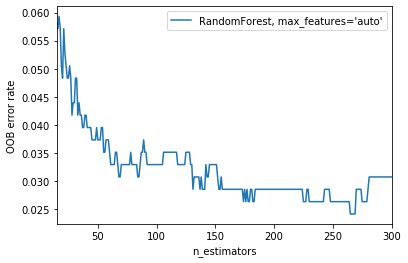

In [22]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Comment: The OOB error rate is not necesarily the lowest at 300 (n_estimators). So the GridSearch show us that the best score is at 300, but not necessarily it is at the lowest OOB error rate. 

## 3) Train a Gradient Boosting classifier

    a) Perform Gridsearch to select the optimal hyperparameters for the following
        i) No of trees ii) max depth
    b) What are the effects of regularization on this model? Explain your observations.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
param_distribution = {'n_estimators': [15, 300],'max_depth' : [4,5,6,7,8,9,10]}

In [25]:
GB = GradientBoostingClassifier(random_state=50)

In [26]:
clf2 = GridSearchCV(GB, param_distribution)
clf2.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [27]:
print("The best Gradien Booster Parameters: {}".format(clf2.best_params_))
print("The best score is {}".format(clf2.best_score_))

The best Gradien Booster Parameters: {'max_depth': 4, 'n_estimators': 300}
The best score is 0.9604395604395604


Comment: The best Gradient Booster Parameters are at max_depth = 4, and n_estimators = 300, which it gives us a score of 96%.

Answer to B: The effects of regularization in the Gradient Booster models is that it will improve the overall results of Gradient Boosting. In other words, it can penalized Learning,by adding L1 and L2 regularizations, therefore prevent overfitting and improve the performance of the model. 

## 4) Compare the performance for the above algorithms (using tuned settings above) on the test data.
    a) Report on the all performance metrics as described in Assignment 1
    b) Which are the most predictive features in the data?
    c) How do your observations change with and without applying PCA on the data


In [28]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [29]:
# need to rename the columns 1 ar 0 for Benign or Maligh

y_train_final = pd.get_dummies(y_train)
y_train_final.drop(columns='B', inplace=True)
y_train_final.head()
y_test_final = pd.get_dummies(y_test)
y_test_final.drop(columns='B', inplace=True)
y_test_final.head()

,M
356,0
556,0
283,1
495,0
364,0


In [30]:
def fit_predict_score(name,clf):
    clf.fit(x_train, np.ravel(y_train_final))
    predicted = clf.predict(x_test)
    labels=[1, 0]
    cm =  metrics.confusion_matrix(y_test_final, predicted, labels)
    fig = plt.figure() 
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm) 
    ax.set_xticklabels([''] + labels) 
    ax.set_yticklabels([''] + labels) 
    fig.colorbar(cax) 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    accuracy = np.round(metrics.accuracy_score(y_test_final , predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_test_final, clf.predict_proba(x_test)[:,1])
    result_roc_auc= roc_auc_score(y_test_final, clf.predict(x_test))
    plt.figure()
    plt.plot(fpr, tpr, marker='.', label=name+ " (Sensitivity -%0.3f)" % result_roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.xlim([-0.1, 1.05])
    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()
    
    
    #Precision -Recall Curve in Python
    lr_precision, lr_recall, _ = precision_recall_curve(y_test_final, clf.predict_proba(x_test)[:, 1])
    lr_f1, lr_auc = f1_score(y_test_final, predicted), auc(lr_recall, lr_precision)
    # summarize scores
    print(name + 'f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    plt.plot(lr_recall, lr_precision, marker='.', label=name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

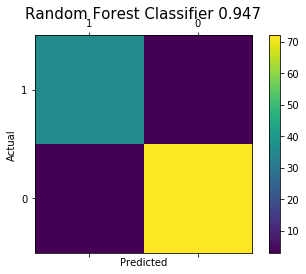

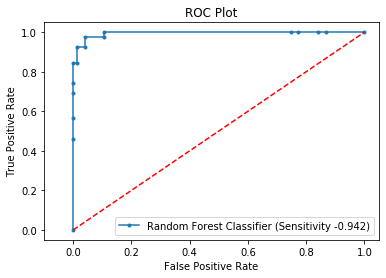

Random Forest Classifierf1=0.923 auc=0.990


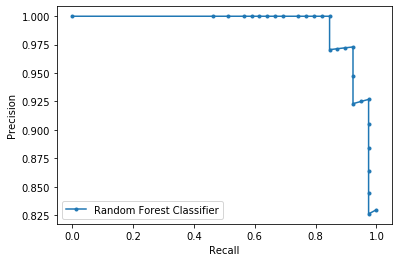

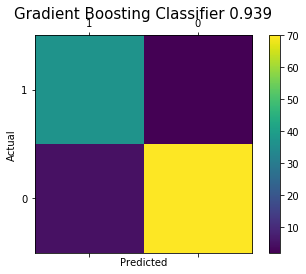

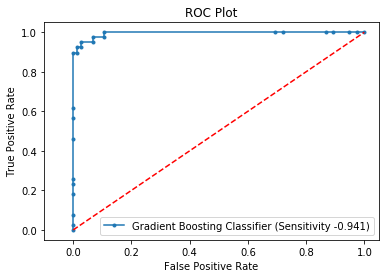

Gradient Boosting Classifierf1=0.914 auc=0.991


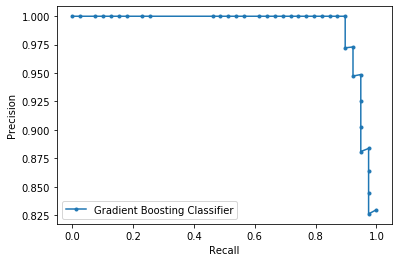

In [31]:
clf0= RandomForestClassifier(max_depth =6, max_features="auto", min_samples_split = 5, random_state=50)
clf1 = GradientBoostingClassifier( max_depth= 4, n_estimators= 300, random_state=50)

names = ["Random Forest Classifier", "Gradient Boosting Classifier"]
classifiers = [clf0, clf1]

for name, clf in zip(names, classifiers):
    fit_predict_score(name,clf)

Comments: Both classifiers The Random Forest and the Gradient Boosting classifier are doing a relatively good job at predicting the type of cancer, based on the accuracy. However, we need to remember that is a relatively imbalanced dataset, therefore we cannot only look at the accuracy score of the models, but look at the precision-recall curve and the F1 score which takes both (precision and recall into account). By looking at the F1 score I can determine that Random Forest (F1 = 0.923) is doing a better job than Gradient Boosting Classifier (F1=0.914).

b) The most predictive feature in the dataset is:

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
# load data

x_predictors = main_data.values

y_target = target.values


# feature extraction
model = ExtraTreesClassifier(n_estimators=300)
model.fit(x_predictors, y_target)
print(model.feature_importances_)

[0.06756215 0.0180978  0.04578152 0.05227807 0.01079753 0.02505851
 0.06187161 0.07890217 0.00843054 0.00685051 0.02437089 0.00546593
 0.02519288 0.03677274 0.00686686 0.00742361 0.00858094 0.0083758
 0.00546939 0.00595744 0.08439711 0.02644919 0.09266409 0.07888157
 0.02072907 0.02285589 0.03887667 0.10037832 0.01324247 0.01141873]


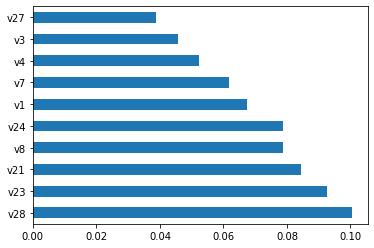

In [33]:
feat_importances = pd.Series(model.feature_importances_, index=main_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Comment: The most predictive feature in the dataset is v8, with an importance of 10.47% in the Importance Feature, followed by v21 with 10% of Variable Function Importance.

c) Now, If I apply PCA to my main data we get the following differences:

In [34]:
from sklearn import decomposition

In [35]:
# 1 component
#If we used only 1 component it explains only 98% of the variance in my data, which is great enough! 
pca = decomposition.PCA(n_components=1)
trans = pca.fit(main_data).transform(main_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.98204467]
0.9820446715106617


In [36]:
# 2 components, will explain 99% of my variance in my data.
pca = decomposition.PCA(n_components=2)
trans = pca.fit(main_data).transform(main_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.98204467 0.01617649]
0.9982211613741723


In [37]:
# I have decided to use 2 components to get the majority of the variance of my data.

In [38]:
trans.shape #We have a total of 569 observations and 2 Principal Components, which is good!

(569, 2)

In [39]:
# split lower dimensional transformed data into training and test sets
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(trans, target, test_size=0.2, random_state=50)

In [40]:
y_train_final_pca = pd.get_dummies(y_pca_train)
y_train_final_pca.drop(columns='B', inplace=True)
y_train_final_pca.head()
y_test_final_pca = pd.get_dummies(y_pca_test)
y_test_final_pca.drop(columns='B', inplace=True)
y_test_final_pca.head()

,M
356,0
556,0
283,1
495,0
364,0


In [41]:
# Performing the Grid Search, the pest parameters for Random Forest, but using PCA

clf2 = GridSearchCV(RF, param_dist)
clf2.fit(x_pca_train, y_pca_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=50,
                               

In [42]:
print("The best Random Forest Parameters: {}".format(clf2.best_params_))
print("The best score is {}".format(clf2.best_score_))

The best Random Forest Parameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 15}
The best score is 0.9362637362637363


In [43]:
GB = GradientBoostingClassifier(random_state=50)
clf3 = GridSearchCV(GB, param_distribution)
clf3.fit(x_pca_train, y_pca_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [44]:
print("The best Gradient Boosting Parameters: {}".format(clf3.best_params_))
print("The best score is {}".format(clf3.best_score_))

The best Random Forest Parameters: {'max_depth': 5, 'n_estimators': 15}
The best score is 0.9208791208791208


In [215]:
def fit_predict_score_2(name,clf):
    clf.fit(x_pca_train, np.ravel(y_train_final_pca))
    predicted = clf.predict(x_pca_test)
    labels=[1, 0]
    cm =  metrics.confusion_matrix(y_test_final_pca, predicted, labels)
    fig = plt.figure() 
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm) 
    ax.set_xticklabels([''] + labels) 
    ax.set_yticklabels([''] + labels) 
    fig.colorbar(cax) 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    accuracy = np.round(metrics.accuracy_score(y_test_final_pca , predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_test_final_pca, clf.predict_proba(x_pca_test)[:,1])
    result_roc_auc= roc_auc_score(y_test_final_pca, clf.predict(x_pca_test))
    plt.figure()
    plt.plot(fpr, tpr, marker='.', label=name+ " (Sensitivity -%0.3f)" % result_roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.xlim([-0.1, 1.05])
    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()
    
    
    #Precision -Recall Curve in Python
    lr_precision, lr_recall, _ = precision_recall_curve(y_test_final_pca, clf.predict_proba(x_pca_test)[:, 1])
    lr_f1, lr_auc = f1_score(y_test_final_pca, predicted), auc(lr_recall, lr_precision)
    # summarize scores
    print(name + 'f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    plt.plot(lr_recall, lr_precision, marker='.', label=name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

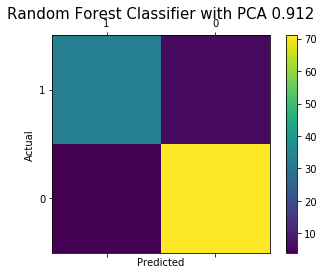

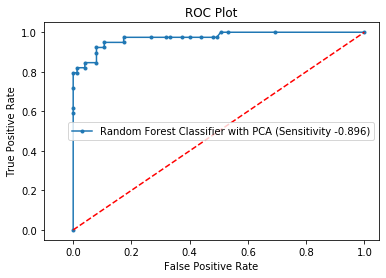

Random Forest Classifier with PCAf1=0.868 auc=0.962


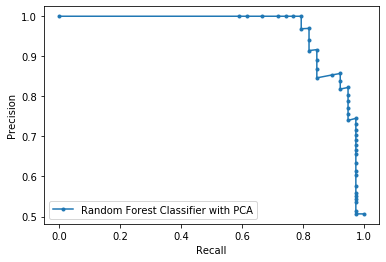

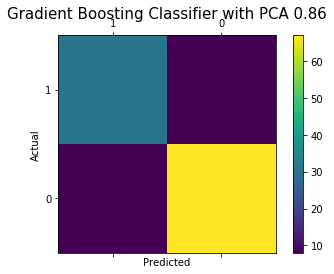

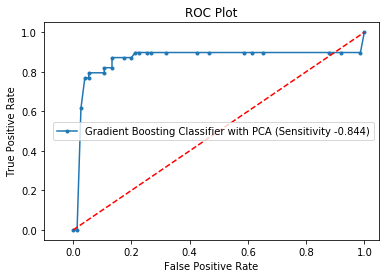

Gradient Boosting Classifier with PCAf1=0.795 auc=0.559


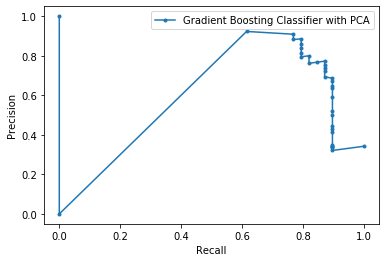

In [216]:
# If we reapply it to my two classification methods, the results are the following:


clf2= RandomForestClassifier(max_depth= 8, max_features= 'auto', min_samples_split= 10, n_estimators= 15, random_state=50)
clf3 = GradientBoostingClassifier( max_depth= 5, n_estimators= 15, random_state=50)

names = ["Random Forest Classifier with PCA", "Gradient Boosting Classifier with PCA"]
classifiers = [clf2, clf3]

for name, clf in zip(names, classifiers):
    fit_predict_score_2(name,clf)


Comments: The main difference in PCA compared to non-PCA is the n-estimators for the PCA data is 15, compared to 300 in the non-PCA. In the PCA we use  2 Principal Components that explain 99% of the variance of my dataset. Similarly, to the results with no PCA, Random Forest seems to be the best option in predicting the Type of Breast Cancer, and for this dataset due that  it has a higher F1-Score (Precisio-Recall Curve), and higher accuracy as well. The accuracy numbers seems to be lower in PCA than the one without PCA. 

## Implement a stacked architecture for the breast cancer prediction problem. The objective is to combine non-homogenous learners in multiple layers to improve your prediction. Summarize your observations. Add a diagram that explains your stacked design.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

In [59]:
main_data.shape

(569, 30)

In [81]:
target.head()

y = pd.get_dummies(target)
y.drop(columns='B', inplace=True)
y.head()

,M
0,1
1,1
2,1
3,1
4,1


In [84]:
y2 = np.array(y)
y3= y2.flatten()

In [86]:
y3.shape

(569,)

In [129]:
# Create Base Learners
base_learners = [('dt_1', DecisionTreeClassifier()), ('knn_1', KNeighborsClassifier(n_neighbors=5))]


# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Extract score
x_train, x_test, y_train, y_test = train_test_split(main_data, y3, stratify=y, random_state=50)
clf.fit(x_train, y_train).score(x_test, y_test)

0.958041958041958

In [133]:
# Create Learners per layer
layer_one_estimators = [('dt_1', DecisionTreeClassifier()), ('knn_1', KNeighborsClassifier(n_neighbors=5))]
layer_two_estimators = [
                        ('gb_2', GradientBoostingClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42))
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

x_train, x_test, y_train, y_test = train_test_split(main_data, y3, stratify=y, random_state=50)
clf.fit(x_train, y_train).score(x_test, y_test)

0.965034965034965

In [147]:
x_train.shape

(426, 30)

In [146]:
%%html
<img src='Diagram_homework2.png'/>

Comment: So the initial training data has 426 observations and 30 columns. There are two different models: decision tree and KNN that are trained on X beforehand. Each model (Decision Trees and KNN) provides a 'y', that is then cast it to the second level training data, which is now m x 2. Second level models (Random Forest and Gradient Boosting), can then be trained on this data (output of the first models) to produce the final outcomes which will be used predictions. The second model is used to make predictions on an OOS test set.